In [1]:
%cd /Users/jingsun/Desktop/UVA/fall18/sys6018/kaggle/data

/Users/jingsun/Desktop/UVA/fall18/sys6018/kaggle/data


In [12]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from string import punctuation

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from collections import Counter

from sklearn.linear_model import Lasso, LinearRegression, ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.shape)
print(test.shape)

(442961, 8)
(238323, 7)


In [4]:
train.drop(['post.id','date'], axis=1, inplace=True)
test.drop(['post.id','date'], axis=1, inplace=True)
print(train.shape)
print(test.shape)

(442961, 6)
(238323, 5)


In [5]:
train_nodup = train.drop_duplicates()
test_nodup = test.drop_duplicates()
print(train_nodup.shape)
print(test_nodup.shape)

(438369, 6)
(235969, 5)


In [6]:
train_groupby = train_nodup.groupby(['user.id','gender','topic','age','sign'],sort=False)['text'].apply(''.join).reset_index()
print(train_groupby.shape)
train_groupby.head()

(12880, 6)


,user.id,gender,topic,age,sign,text
0,11869,male,Student,15,Leo,"Info has been found (+/- 100 pages,..."
1,16332,male,InvestmentBanking,33,Aquarius,Thanks to Yahoo!'s Toolbar I can ...
2,6636,female,indUnk,14,Aries,O= optimist P= pessimist My...
3,3668,female,Student,17,Gemini,http://www.uploadimages.net/i...
4,12196,male,Non-Profit,25,Cancer,i was a weedy child. this wasn't so muc...


In [7]:
test_groupby = test_nodup.groupby(['user.id','gender','topic','sign'],sort=False)['text'].apply(''.join).reset_index()
print(test_groupby.shape)
test_groupby.head()

(6440, 5)


,user.id,gender,topic,sign,text
0,4876,female,indUnk,Capricorn,"urlLink im new to this, ..."
1,12227,female,Student,Aries,"Met Lim this morning, then we..."
2,2898,female,indUnk,Aquarius,"Well, I hate to start off no such a sou..."
3,12334,female,indUnk,Aquarius,I had this conversation with a man the ...
4,6489,female,indUnk,Sagittarius,Even though I am exhausted after ...


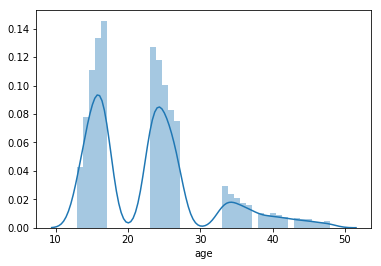

In [8]:
sns.distplot(train_groupby['age'])

In [9]:
data = pd.concat([train_groupby,test_groupby],axis = 0)
print(data.shape)
data.head()

(19320, 6)


,age,gender,sign,text,topic,user.id
0,15.0,male,Leo,"Info has been found (+/- 100 pages,...",Student,11869
1,33.0,male,Aquarius,Thanks to Yahoo!'s Toolbar I can ...,InvestmentBanking,16332
2,14.0,female,Aries,O= optimist P= pessimist My...,indUnk,6636
3,17.0,female,Gemini,http://www.uploadimages.net/i...,Student,3668
4,25.0,male,Cancer,i was a weedy child. this wasn't so muc...,Non-Profit,12196


In [10]:
data['Upper'] = data.text.apply(lambda x: len([each for each in list(x) if each.isupper()]))
print("Completed Upper")
data['Lower'] = data.text.apply(lambda x: len([each for each in list(x) if each.islower()]))
print("Completed Lower")
data['Alphabets'] = data.text.apply(lambda x: len([each for each in list(x) if each.isalpha()]))
print("Completed Alphabet")
data['Numeric'] = data.text.apply(lambda x: len([each for each in list(x) if each.isnumeric()]))
print("Completed Numeric")
data['Punctuation'] = data.text.apply(lambda x: len([each for each in list(x) if each in punctuation]))
print("Completed Punctuation")

Completed Upper
Completed Lower
Completed Alphabet
Completed Numeric
Completed Punctuation


In [13]:
data['Total_char'] =  data.text.apply(lambda x: len(list(x)))
print("Completed Total Characters")

stop_words = stopwords.words('english')
data['Stopwords'] =  data.text.apply(lambda x: len([each for each in x.split(" ") if each in stop_words]))
print("Completed Stopwords")

Completed Total Characters
Completed Stopwords


In [14]:
data['Upper_ratio'] = data['Upper']/data['Total_char']
data['Lower_ratio'] = data['Lower']/data['Total_char']
data['Number_ratio'] = data['Numeric']/data['Total_char']
data['Punctuation_ratio'] = data['Punctuation']/data['Total_char']

In [15]:
data.drop(['Upper','Lower','Alphabets','Numeric','Punctuation'],axis=1,inplace=True)
print(data.shape)
data.head()

(19320, 12)


,age,gender,sign,text,topic,user.id,Total_char,Stopwords,Upper_ratio,Lower_ratio,Number_ratio,Punctuation_ratio
0,15.0,male,Leo,"Info has been found (+/- 100 pages,...",Student,11869,25848,1730,0.028242,0.753985,0.007970,0.035012
1,33.0,male,Aquarius,Thanks to Yahoo!'s Toolbar I can ...,InvestmentBanking,16332,160853,11287,0.030767,0.713509,0.010556,0.045116
2,14.0,female,Aries,O= optimist P= pessimist My...,indUnk,6636,19058,1327,0.033739,0.701805,0.000420,0.036887
3,17.0,female,Gemini,http://www.uploadimages.net/i...,Student,3668,15046,1194,0.011631,0.728699,0.004121,0.039678
4,25.0,male,Cancer,i was a weedy child. this wasn't so muc...,Non-Profit,12196,77837,6455,0.000463,0.766332,0.001837,0.038080


In [24]:
data.drop(['text'],axis=1).to_csv('data.csv',index=False)

In [25]:
data_dummies = pd.get_dummies(data,columns=['gender','topic','sign'])
print(data_dummies.shape)
data_dummies.head()

(19320, 63)


,age,text,user.id,Total_char,Stopwords,Upper_ratio,Lower_ratio,Number_ratio,Punctuation_ratio,gender_female,...,sign_Cancer,sign_Capricorn,sign_Gemini,sign_Leo,sign_Libra,sign_Pisces,sign_Sagittarius,sign_Scorpio,sign_Taurus,sign_Virgo
0,15.0,"Info has been found (+/- 100 pages,...",11869,25848,1730,0.028242,0.753985,0.007970,0.035012,0,...,0,0,0,1,0,0,0,0,0,0
1,33.0,Thanks to Yahoo!'s Toolbar I can ...,16332,160853,11287,0.030767,0.713509,0.010556,0.045116,0,...,0,0,0,0,0,0,0,0,0,0
2,14.0,O= optimist P= pessimist My...,6636,19058,1327,0.033739,0.701805,0.000420,0.036887,1,...,0,0,0,0,0,0,0,0,0,0
3,17.0,http://www.uploadimages.net/i...,3668,15046,1194,0.011631,0.728699,0.004121,0.039678,1,...,0,0,1,0,0,0,0,0,0,0
4,25.0,i was a weedy child. this wasn't so muc...,12196,77837,6455,0.000463,0.766332,0.001837,0.038080,0,...,1,0,0,0,0,0,0,0,0,0


In [26]:
from sklearn.model_selection import cross_val_score, train_test_split

In [59]:
ntrain = train_groupby.shape[0]
data_train = data_dummies[:ntrain]

X_train, X_test, y_train, y_test = \
        train_test_split(data_train, data_train['age'], test_size = 0.5, random_state = 22)
print("X_train: " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train: " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train: (6440, 63)
X_test : (6440, 63)
y_train: (6440,)
y_test : (6440,)


In [68]:
def getMostCommon(posts, k):
    '''
    Parameters:
        posts = a string of all text in the text column
        k = number of most common words
    Return Value:
        words = a list of k most common words appeared in posts
    '''
    tokens = word_tokenize(posts)
    words = [w.lower() for w in tokens if w.isalpha()]
    table = str.maketrans('','',string.punctuation)
    nopunc = [w.translate(table) for w in words]
    
    stop_words = stopwords.words('english')
    nostop = [w for w in nopunc if not w in stop_words]
    
    stemmer = PorterStemmer()
    stemmed = [stemmer.stem(w) for w in nostop]
    
    count = Counter(stemmed)
    mostcommon = count.most_common(k)
    words = [w[0] for w in mostcommon if len(w[0]) > 2 and w[0] != 'urllink']
    
    return(words)  

In [61]:
def getFreq(postList, words, data):
    vectorizer = CountVectorizer(vocabulary = words)
    matrix = vectorizer.fit_transform(postList)
    freqmat = matrix.todense()
    freq_df = pd.DataFrame(freqmat)
    freq_df['user.id'] = data['user.id'].tolist()
    
    data_freq = pd.merge(data, freq_df, how='left',on='user.id')
    data_freq.drop(['user.id','text'], axis=1, inplace=True)
    
    return(data_freq)

In [69]:
posts = X_train['text'].to_string()
words = getMostCommon(posts, 80)

postList = X_train['text'].tolist()
X_train_freq = getFreq(postList, words, X_train)

X_train_freq.drop('age',axis=1,inplace=True)
print(X_train_freq.shape)
X_train_freq.head()

(6440, 127)


,Total_char,Stopwords,Upper_ratio,Lower_ratio,Number_ratio,Punctuation_ratio,gender_female,gender_male,topic_Accounting,topic_Advertising,...,57,58,59,60,61,62,63,64,65,66
0,5555,325,0.049325,0.686229,0.011701,0.048245,0,1,0,0,...,0,0,2,2,0,1,2,0,0,0
1,13271,911,0.031422,0.686007,0.000226,0.081531,1,0,0,0,...,8,0,3,2,0,0,7,0,0,1
2,8180,537,0.042543,0.685575,0.005379,0.054645,0,1,0,0,...,0,0,4,1,0,0,7,0,0,1
3,53869,2831,0.020735,0.704951,0.002246,0.089309,0,1,0,0,...,3,6,4,4,0,0,5,0,2,11
4,37685,2741,0.030118,0.726655,0.002123,0.036221,0,1,0,0,...,7,0,8,2,0,1,16,0,0,0


In [70]:
lr = LinearRegression()
LRMd = lr.fit(X_train_freq.values,y_train)

In [71]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.005, random_state=22))
LassoMd = lasso.fit(X_train_freq.values, y_train)

In [72]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.005, random_state=22))
ENetMd = ENet.fit(X_train_freq.values,y_train)

### Validation set

In [73]:
postList = X_test['text'].tolist()
X_test_freq = getFreq(postList, words, X_test)

X_test_freq.drop('age',axis=1,inplace=True)
print(X_test_freq.shape)
X_test_freq.head()

(6440, 127)


,Total_char,Stopwords,Upper_ratio,Lower_ratio,Number_ratio,Punctuation_ratio,gender_female,gender_male,topic_Accounting,topic_Advertising,...,57,58,59,60,61,62,63,64,65,66
0,6344,399,0.027112,0.756620,0.002207,0.027743,0,1,0,0,...,0,0,0,0,0,0,5,0,0,0
1,8010,653,0.006866,0.721348,0.002871,0.045069,0,1,0,0,...,3,0,0,0,0,0,0,0,1,0
2,107624,6480,0.031499,0.620763,0.006987,0.046923,0,1,0,0,...,21,0,11,14,0,2,39,0,2,0
3,3383,172,0.036358,0.663021,0.002365,0.081584,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,4557,363,0.020847,0.696730,0.004608,0.066491,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0


In [74]:
LRpred = LRMd.predict(X_test_freq.values)
Lassopred = LassoMd.predict(X_test_freq.values)
ENetpred = ENetMd.predict(X_test_freq.values)

ens2 = (LRpred + Lassopred) / 2
ens22 = (Lassopred + ENetpred) / 2
ens3 = (LRpred + Lassopred + ENetpred) / 3

print('LR:', np.mean(abs(y_test - LRpred)))
print('Lasso:', np.mean(abs(y_test - Lassopred)))
print('LR+Lasso:', np.mean(abs(y_test - ens2)))
print('ENet:', np.mean(abs(y_test - ENetpred)))
print('all:', np.mean(abs(y_test - ens3)))

LR: 4.895081463946375
Lasso: 4.872166721394862
LR+Lasso: 4.879096234328969
ENet: 4.86932565234343
all: 4.874415781782369


### Final model

In [79]:
posts = data_train['text'].to_string()
words = getMostCommon(posts, 50)

postList = data_train['text'].tolist()
data_train_freq = getFreq(postList, words, data_train)

data_train_freq.drop('age',axis=1,inplace=True)
print(data_train_freq.shape)
data_train_freq.head()

(12880, 102)


,Total_char,Stopwords,Upper_ratio,Lower_ratio,Number_ratio,Punctuation_ratio,gender_female,gender_male,topic_Accounting,topic_Advertising,...,32,33,34,35,36,37,38,39,40,41
0,25848,1730,0.028242,0.753985,0.007970,0.035012,0,1,0,0,...,1,1,0,4,8,5,1,0,0,4
1,160853,11287,0.030767,0.713509,0.010556,0.045116,0,1,0,0,...,7,20,47,25,9,45,17,1,1,21
2,19058,1327,0.033739,0.701805,0.000420,0.036887,1,0,0,0,...,4,10,12,11,6,11,2,0,0,15
3,15046,1194,0.011631,0.728699,0.004121,0.039678,1,0,0,0,...,5,3,6,7,7,5,12,0,0,6
4,77837,6455,0.000463,0.766332,0.001837,0.038080,0,1,0,0,...,5,6,12,27,15,26,10,2,0,15


In [80]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.005, random_state=22))
ENetMd = ENet.fit(data_train_freq.values,data_train['age'])

### Final predictions

In [49]:
data_test = data_dummies[ntrain:]
data_test.drop(['age'], axis=1, inplace=True)
print(data_test.shape)
data_test.head()

(6440, 62)


,text,user.id,Total_char,Stopwords,Upper_ratio,Lower_ratio,Number_ratio,Punctuation_ratio,gender_female,gender_male,...,sign_Cancer,sign_Capricorn,sign_Gemini,sign_Leo,sign_Libra,sign_Pisces,sign_Sagittarius,sign_Scorpio,sign_Taurus,sign_Virgo
0,"urlLink im new to this, ...",4876,4749,322,0.024005,0.753632,0.001895,0.036218,1,0,...,0,1,0,0,0,0,0,0,0,0
1,"Met Lim this morning, then we...",12227,28699,1473,0.023346,0.715112,0.003450,0.068818,1,0,...,0,0,0,0,0,0,0,0,0,0
2,"Well, I hate to start off no such a sou...",2898,3665,323,0.035471,0.729604,0.001910,0.032196,1,0,...,0,0,0,0,0,0,0,0,0,0
3,I had this conversation with a man the ...,12334,23361,1755,0.036000,0.678096,0.015196,0.069988,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Even though I am exhausted after ...,6489,5236,361,0.029603,0.739305,0.000573,0.038006,1,0,...,0,0,0,0,0,0,1,0,0,0


In [82]:
postList = data_test['text'].tolist()
test_freq = getFreq(postList, words, data_test)

print(test_freq.shape)
test_freq.head()

(6440, 102)


,Total_char,Stopwords,Upper_ratio,Lower_ratio,Number_ratio,Punctuation_ratio,gender_female,gender_male,topic_Accounting,topic_Advertising,...,32,33,34,35,36,37,38,39,40,41
0,4749,322,0.024005,0.753632,0.001895,0.036218,1,0,0,0,...,0,0,3,1,0,0,1,0,0,0
1,28699,1473,0.023346,0.715112,0.003450,0.068818,1,0,0,0,...,7,2,18,18,7,9,5,1,0,0
2,3665,323,0.035471,0.729604,0.001910,0.032196,1,0,0,0,...,2,1,3,2,2,0,1,0,0,0
3,23361,1755,0.036000,0.678096,0.015196,0.069988,1,0,0,0,...,3,2,6,10,14,7,5,0,0,14
4,5236,361,0.029603,0.739305,0.000573,0.038006,1,0,0,0,...,0,0,0,2,0,1,1,1,0,1


In [83]:
pred = ENetMd.predict(test_freq.values)

In [84]:
pred_df = pd.DataFrame({'user.id': test_groupby['user.id'].tolist(), 'age': list(pred)})
pred_df = pred_df.loc[:,['user.id','age']]
pred_df.head()

,user.id,age
0,4876,24.816956
1,12227,15.214332
2,2898,24.287412
3,12334,22.327739
4,6489,24.205590


In [85]:
pred_df.to_csv('ENet3.csv',index=False)